<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Session 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Import the required libraries**

In [1]:
# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The quality assurance department claims that on average the non-fat yogurt contains less than 148 mg of potassium per 100 g pack. To check this claim 35 packs of yogurt are collected and the content of potassium is recorded. Can we use the Z-test to test the claim of the quality assurance department?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given below:
        
        pot_mg = [151, 159, 168, 146, 129, 147, 149, 141, 150, 158, 119, 125, 139, 154, 163, 156, 132, 137, 126, 152,
                  127, 135, 138, 145, 128, 148, 153, 124, 170, 134, 157, 164, 144, 160, 161]


The given random sample is the quantity of potassium in a 100g pack of non-fat yogurt which is continuous in nature. To apply the Z-test for the population mean we need to test whether the sample is taken from a normally distributed population. Use the `Shapiro-Wilk test` to check the normality of the data.

In [3]:
# given potassium content
pot_mg = [151, 159, 168, 146, 129, 147, 149, 141, 150, 158, 119, 125, 139, 154, 163, 156, 132, 137, 126, 152,
          127, 135, 138, 145, 128, 148, 153, 124, 170, 134, 157, 164, 144, 160, 161]

# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the sample data to perform the test
stat, p_value = shapiro(pot_mg)

# print the p-value 
print('P-Value:', p_value)

P-Value: 0.4285268187522888


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the data is normally distributed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. The quality assurance department claims that on average the non-fat yogurt contains less than 148 mg of potassium per 100 g pack. To check this claim 35 packs of yogurt are collected and the content of potassium is recorded. Use 0.05 as a level of significance to test the claim using p-value technique.   
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Use the data given below:
        
          pot_mg = [151, 159, 168, 146, 129, 147, 149, 141, 150, 158, 119, 125, 139, 154, 163, 156, 132, 137, 126, 152,
                    127, 135, 138, 145, 128, 148, 153, 124, 170, 134, 157, 164, 144, 160, 161]

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \geq 148 $<br>
H<sub>1</sub>: $\mu < 148 $

In [4]:
# given potassium content
pot_mg = [151, 159, 168, 146, 129, 147, 149, 141, 150, 158, 119, 125, 139, 154, 163, 156, 132, 137, 126, 152,
          127, 135, 138, 145, 128, 148, 153, 124, 170, 134, 157, 164, 144, 160, 161]

# 'ztest()' returns the test statistic and corresponding p-value
# pass the sample data to the parameter, 'x1'
# pass the value in null hypothesis to the parameter, 'value'
# pass the one-tailed condition to the parameter, 'alternative'
z_score, pval = stests.ztest(x1 = pot_mg, value = 148, alternative = 'smaller')

# print the p-value
print("p-value: ", pval)

p-value:  0.13356148631189496


Here the p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis. Thus, there is no enough evidence to conclude that on average the non-fat yogurt contains less than 148 mg of potassium per 100 g pack.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. The production manager at the Xen Sewing Factory claims that on average the diameter of a class 14M bobbin is less than 18 mm. The previous study shows that the standard deviation is 1.7 mm. Consider a sample of 40 class 14M bobbins from a normally distributed population with sample mean diameter as 17.5 mm. Plot the acceptance and rejection regions to test the claim of the production manager with 99% confidence. 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \geq 18 $<br>
H<sub>1</sub>: $\mu < 18 $

Let us plot the acceptance and rejection region for a left-tailed test with 99% confidence.

In [5]:
# define a function to calculate the Z-test statistic 
# pass the population mean, population standard deviation, sample size and sample mean as the function input
def z_test(pop_mean, pop_std, n, samp_mean):
   
    # calculate the test statistic
    z_score = (samp_mean - pop_mean) / (pop_std / np.sqrt(n))

    # return the z-test value
    return z_score

# given data
n = 40
pop_mean = 18
pop_std = 1.7
samp_mean = 17.5

# calculate the test statistic using the function 'z_test'
z_score = z_test(pop_mean, pop_std, n, samp_mean)
print("Z-score:", z_score)

Z-score: -1.8601633295108115


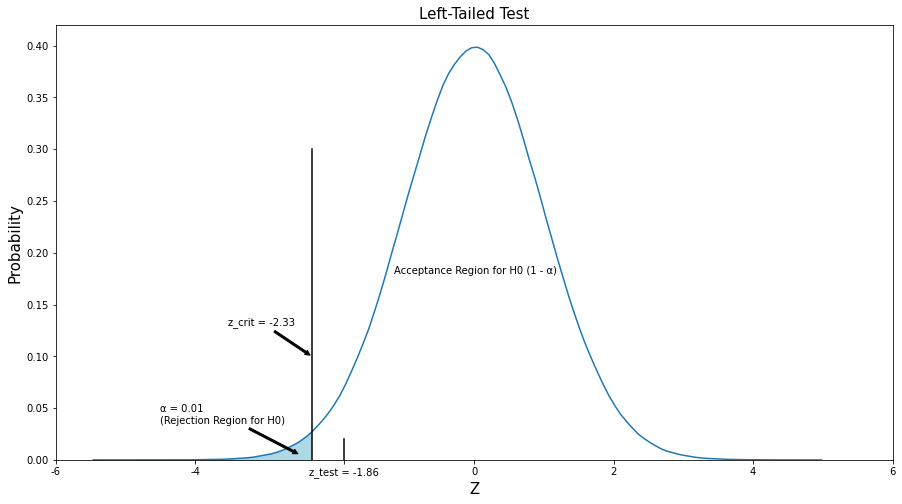

In [6]:
# consider a random variable 'X' that follows a standard normal distribution 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(size = 2000000, random_state = 2)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# use 'stats.norm.isf()' to calculate the critical z-value for alpha = 0.01
# pass the value of 'alpha' to the parameter 'q'
z = stats.norm.isf(q = 0.01)

# as normal distribution is symmetric, for a left-tailed test draw a line at -(z-value)
# plot a vertical line at -(z-value) 
x, y = [-z, -z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-score value
x, y = [z_score, z_score], [0, 0.02]
plt.plot(x, y, color = 'black')

# add the color to the left of the -(z-value)
# get the data for x and y axes for the distribution plot
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are less than -(z-value)
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= -z], y1[x1 <= -z], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.01\n(Rejection Region for H0)', xy = (-2.5, 0.005), xytext = (-4.5, 0.035), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(-z,2)), xy = (-z, 0.1), xytext = (-z-1.2, 0.13), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.15, y = 0.18, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -4, 0, 2, 4, 6, round(z_score,2)], 
           labels = [-6, -4, 0, 2, 4, 6, 'z_test = '+str(round(z_score,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Left-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, that implies we fail to reject (i.e. accept) $H_{0}$.  Thus, there is no enough evidence to conclude that on average the diameter of a class 14M bobbin is less than 18 mm.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. The production manager at the Xen Sewing Factory claims that on average the diameter of a class 14M bobbin is less than 18 mm. The previous study shows that the standard deviation is 1.7 mm. Consider a sample of 40 class 14M bobbins from a normally distributed population with sample mean diameter as 17.5 mm. Calculate the type II error using the power of the hypothesis test. The type I error is given as 0.01.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \geq 18 $<br>
H<sub>1</sub>: $\mu < 18 $

In [7]:
# import the function to calculate the power of test
from statsmodels.stats import power

# number of observations 
num_obs = 40

# calculate the sample mean
samp_mean = 17.5

# null hypothesis value
hypo_mean = 18

# population standard deviation
pop_sd = 1.7

# use 'zt_ind_solve_power()' to calculate the power of the z-test
# keep the value of exact one parameter as 'None' to calculate the value of that parameter using remaining values 
# calculate the 'effect_size' using the sample_mean, null hypothesis value and population standard deviation
# pass the sample size to the parameter, 'nobs1'
# pass the value of alpha to the parameter, 'alpha'
# pass 'None' to the parameter 'power' as we want to calculate its value
# for one sample test, consider the 'ratio' as 0
# pass the alternative for one-tailed test to the parameter, 'alternative'
power = power.zt_ind_solve_power(effect_size = (samp_mean - hypo_mean)/pop_sd, 
                         nobs1 = num_obs, 
                         alpha = 0.01, 
                         power = None, 
                         ratio = 0, 
                         alternative = 'smaller')

# calculate type II error
print('Type II error:', 1 - power)

Type II error: 0.6794582943877454


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. A research paper in the medical journal claims that the average height of females in Nebraska is less than 168 cm. A group of physicians conducted a survey and collected the heights of 95 females from Nebraska, and recorded the average height as 163 cm with a standard deviation of 7 cm. Assume that the sample is drawn from a normally distributed population. Test the claim in the research paper using the 95% confidence interval for the population mean.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

As the sample size is large (> 30) we use the one sample Z-test for population mean.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \geq 168$<br>
H<sub>1</sub>: $\mu < 168$

In [8]:
# sample size
n = 95

# sample mean
samp_mean = 163

# sample standard deviation
samp_std = 7

# calculate the 95% confidence interval for the population mean
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (sample_std / n^(1/2)) to the parameter, 'scale'
# use 'stdev()' to calculate the sample standard deviation 
print('Confidence interval for population mean:', stats.norm.interval(0.95, loc = samp_mean, scale = samp_std / np.sqrt(n)))

Confidence interval for population mean: (161.59238356669675, 164.40761643330325)


Here the confidence interval does not contain the value in the null hypothesis (i.e. 168), thus we reject the null hypothesis and thus, we have enough evidence to conclude that the average height of females in Nebraska is less than 168 cm.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. A financial firm AlpaMoney has recently started their online payment gateway and claims that the level of customer satisfaction about the transactions is the same as that of their competitor firm PayEarly. Consider the equality of an average level of satisfaction as the null hypothesis and test the claim using a critical value method with 90% confidence.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<img src='2_z.png'>

Let $\mu_{A}$ be the population average level of satisfaction for customers of company AlpaMony. and  $\mu_{P}$ be the population average level of satisfaction for customers of company PayEarly.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{A} - \mu_{P} = 0$<br>
H<sub>1</sub>: $\mu_{A} - \mu_{P} \neq 0$

Here ⍺ = 0.1, for a two-tailed test calculate the critical z-value.

In [9]:
# calculate the z-value for 90% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' for a two-tailed test to the parameter 'q', here alpha = 0.1
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.1/2), 2))

print('Critical value for two-tailed Z-test:', z_val)

Critical value for two-tailed Z-test: 1.64


i.e. if z is less than -1.64 or z is greater than 1.64 then we reject the null hypothesis.

In [10]:
# define a function to calculate the test statistic and corresponding p-value
# here the standard deviations for populations are unknown, thus use the sample standard deviations
# pass the sample mean, sample standard deviation and sample size for both the samples as the function input
# 'value' denotes the value in null hypothesis
def TwoSampZTest(samp_mean_1, samp_mean_2, samp_std_1, samp_std_2, value, n1, n2):
    
    # calculate the test statistic
    denominator = np.sqrt((samp_std_1**2 / n1) + (samp_std_2**2 / n2))
    zscore = ((samp_mean_1 - samp_mean_2) - (value)) / denominator
    
    # return the z-score
    return zscore

# given data
sm_1 = 4.23
sm_2 = 3.56
sstd_1 = 1.6
sstd_2 = 0.72
null_val = 0
n_1 = 527
n_2 = 652

# pass the given data to the function 'TwoSampZTest'
zscore = TwoSampZTest(samp_mean_1 = sm_1, samp_mean_2 = sm_2, samp_std_1 = sstd_1, samp_std_2 = sstd_2, value = null_val, 
                      n1 = n_1, n2 = n_2)

print('z-score:', zscore)

z-score: 8.91135766652653


Here the z-score is greater than 1.64. Thus, we reject the null hypothesis and conclude that the customer level of satisfaction for both the companies is not the same.